# Business Background
Auto BI Renewal Insurance Assessment provides financial protection against physical damage or bodily injury resulting from traffic collisions, theft and other vehicle-related incidents.

# Problem :
The company wants to offer "INSURANCE RENEWAL OFFERS" to its customers. However, contacting all customers certainly costs more, so it is necessary to predict which customers will be contacted and agree to renew insurance. Besides that, retaining customers to continue subscribing to insurance for a long time is more effective than finding new customers.

# Goals :
- Reduce communication costs
- Maintaining customers who take car insurance services to remain customers
- Building a model to predict customer interest in vehicle insurance renewal so that it can help companies in planning communication strategies.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv", parse_dates = ['Effective To Date'], index_col = 0)

In [3]:
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.shape # The dataset consists of 9134 rows and 23 columns

(9134, 23)

In [5]:
df.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
for column in df.columns:
    print(f"{column} :")
    print(df[column].unique(), "\n")

State :
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon'] 

Customer Lifetime Value :
[ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866] 

Response :
['No' 'Yes'] 

Coverage :
['Basic' 'Extended' 'Premium'] 

Education :
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] 

Effective To Date :
['2011-02-24T00:00:00.000000000' '2011-01-31T00:00:00.000000000'
 '2011-02-19T00:00:00.000000000' '2011-01-20T00:00:00.000000000'
 '2011-02-03T00:00:00.000000000' '2011-01-25T00:00:00.000000000'
 '2011-01-18T00:00:00.000000000' '2011-01-26T00:00:00.000000000'
 '2011-02-17T00:00:00.000000000' '2011-02-21T00:00:00.000000000'
 '2011-01-06T00:00:00.000000000' '2011-02-06T00:00:00.000000000'
 '2011-01-10T00:00:00.000000000' '2011-01-17T00:00:00.000000000'
 '2011-01-05T00:00:00.000000000' '2011-02-27T00:00:00.000000000'
 '2011-01-14T00:00:00.000000000' '2011-01-21T00:00:00.000000000'
 '2011-02-05T00:00:00.000000000' '2011-01-29T00:00:00.000000000'
 '2

- Customer ID:

- State: The country where the customer lives

- Customer Lifetime Value (CLV) : the total value of revenue that can be obtained from the customer (the total amount of money that the customer expects to spend on the business, or product, over their lifetime.)

- Response: Response to the offer

- Coverage: Basic, Extended, Premium

- Education: Education level

- Effective to Date: The date of Policy expiration.

- Employment Status : Employed, Unemployed, Retired, Disabled, Medical Leave

- Gender : Male, Female

- Income: Customer's Annual Income

- Location Code: Rural, Suburban, Urban

- Marital Status: Single, Married, Divorced

- Monthly Premium Auto : Total monthly insurance payment

- Months Since Last Claim : Months since the last Insurance Claim

- Months Since Policy Inception : The duration in months since the Insurance Policy Inception

- Number of Open Complaints : The total of Pending complaints

- Number of Policies : Number of policies currently owned by the customer

- Policy Type : Corporate Auto, Personal Auto, Special Auto

- Policy: Level 1, level 2, level 3

- Renew Offer Type : 4 types of renewal offers (Offer 1, Offer 2, Offer 3, Offer 4)

- Sales Channel : Channel to purchase policies (Agent, Branch, Call Center, Web)

- Total Claim Amount : The total sum of claims from Policy Inception

- Vehicle Class : 4-Door, Luxury, Luxury SUV, Sports Car, SUV, 2-Door

- Vehicle Size: Large, Midsize, Small

In [7]:
df.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State                          9134 non-null   object        
 1   Customer Lifetime Value        9134 non-null   float64       
 2   Response                       9134 non-null   object        
 3   Coverage                       9134 non-null   object        
 4   Education                      9134 non-null   object        
 5   Effective To Date              9134 non-null   datetime64[ns]
 6   EmploymentStatus               9134 non-null   object        
 7   Gender                         9134 non-null   object        
 8   Income                         9134 non-null   int64         
 9   Location Code                  9134 non-null   object        
 10  Marital Status                 9134 non-null   object        
 11  Monthly Premi

In [9]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38
Income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00
Monthly Premium Auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00
Months Since Last Claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00
Months Since Policy Inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00
Number of Open Complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00
Number of Policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00
Total Claim Amount,9134.0,434.09,290.50,0.10,272.26,383.95,547.51,2893.24


#### Range Customer Lifetime Value (CLV) is ~1,900 to ~85,000 dollars
#### Range income is 0 to ~ 100,000 dollars
#### Premium paid by the customer (Monthly Premium Auto) is 61 to ~ 300 dollars per month
#### There are customers who have just bought a policy and some who have been there for more than 8 years
#### Range open complaint is 0 - 5 complaints per customer
#### The number of policies purchased by customers ranges from 1 - 9 policies

In [10]:
df_describe = df.drop(columns = ['State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 
                                 'Gender', 'Location Code', 'Marital Status', 'Months Since Last Claim', 
                                 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 
                                 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'])

df_describe.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Total Claim Amount'],
      dtype='object')

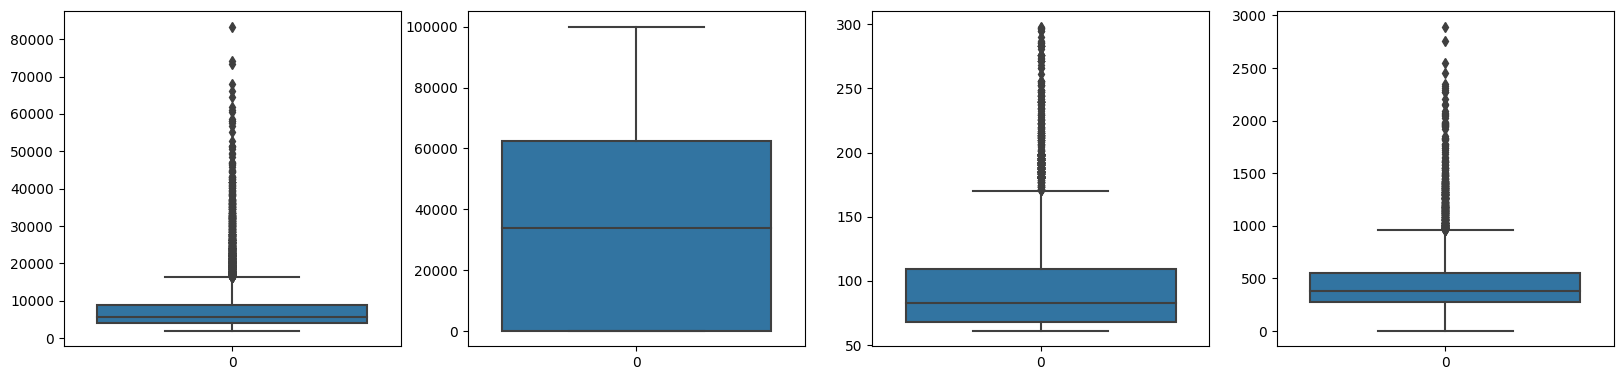

In [11]:
# Outliers were not removed because in real cases, the variables below have varying values

plt.figure(figsize =(20, 20))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,4,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

## Data Preparation

#### Check the Total Claim Amount

In [12]:
# are there any claims < 10 dollars?

less_than_10 = df[df['Total Claim Amount'] < 10]
less_than_10.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
HG65722,Oregon,12819.102890,No,Premium,Doctor,2011-01-25,Disabled,F,10105,Rural,...,4,3,3,Personal Auto,Personal L2,Offer1,Branch,0.517753,SUV,Medsize
MO91628,Oregon,2614.474305,No,Basic,Master,2011-02-11,Employed,M,65186,Rural,...,27,0,1,Personal Auto,Personal L2,Offer2,Web,5.434505,Two-Door Car,Large
RB50392,Washington,7838.068321,No,Basic,Master,2011-02-17,Unemployed,F,0,Rural,...,12,0,2,Personal Auto,Personal L1,Offer2,Agent,2.704934,Four-Door Car,Medsize
BS77946,Arizona,9753.307106,No,Extended,Bachelor,2011-02-24,Medical Leave,F,17514,Rural,...,5,0,3,Personal Auto,Personal L1,Offer1,Branch,8.312729,SUV,Medsize
EW38459,Nevada,2567.151468,No,Basic,Bachelor,2011-02-20,Employed,F,40864,Rural,...,75,0,1,Corporate Auto,Corporate L1,Offer2,Web,9.515280,Four-Door Car,Medsize


In [13]:
len(less_than_10)

89

In [14]:
df.drop(df[df['Total Claim Amount'] < 10].index, inplace = True)

In [15]:
df[df['Total Claim Amount'] < 10]

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,


#### Check whether there are customers who are working but income is 0

In [16]:
con1 = df['Income'] == 0
con2 = df['EmploymentStatus'] == 'Employed'

df[con1 & con2]

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,


#### Binning Income, Total Claim Amount, Customer Lifetime Value, Monthly Premium Auto and Number of Policies

In [17]:
df['Income'].min(), df['Income'].median(), df['Income'].max()

(0, 33738.0, 99981)

In [18]:
value_bin = [-1, 25000, 50000, df['Income'].max()]
label_bin = ['Low Income', 'Medium Income', 'High Income']

df['Income_group'] = pd.cut(df['Income'], bins = value_bin, labels = label_bin)

df['Income_group'].head()

Customer
BU79786      High Income
QZ44356       Low Income
AI49188    Medium Income
WW63253       Low Income
HB64268    Medium Income
Name: Income_group, dtype: category
Categories (3, object): ['Low Income' < 'Medium Income' < 'High Income']

In [19]:
df['Total Claim Amount'].min(), df['Total Claim Amount'].median(), df['Total Claim Amount'].max()

(10.168824, 386.765125, 2893.239678)

In [20]:
value_bin = [0, 400, 1500, df['Total Claim Amount'].max()]
label_bin = ['up to 400 ','up to 1500', 'more than 1500']

df['Claim_group'] = pd.cut(df['Total Claim Amount'], bins = value_bin, labels = label_bin)

df['Claim_group'].head()

Customer
BU79786    up to 400 
QZ44356    up to 1500
AI49188    up to 1500
WW63253    up to 1500
HB64268    up to 400 
Name: Claim_group, dtype: category
Categories (3, object): ['up to 400 ' < 'up to 1500' < 'more than 1500']

In [21]:
df['Customer Lifetime Value'].min(), df['Customer Lifetime Value'].median(), df['Customer Lifetime Value'].max()

(1898.007675, 5790.462518, 83325.38119)

In [22]:
value_bin = [0, 6000, 30000, df['Customer Lifetime Value'].max()]
label_bin = ['up to 6.000','up to 30.000', 'more than 30.000']

df['clv_group'] = pd.cut(df['Customer Lifetime Value'], bins = value_bin, labels = label_bin)

df['clv_group'].head()

Customer
BU79786     up to 6.000
QZ44356    up to 30.000
AI49188    up to 30.000
WW63253    up to 30.000
HB64268     up to 6.000
Name: clv_group, dtype: category
Categories (3, object): ['up to 6.000' < 'up to 30.000' < 'more than 30.000']

In [23]:
df['Monthly Premium Auto'].min(), df['Monthly Premium Auto'].median(), df['Monthly Premium Auto'].max()

(61, 83.0, 298)

In [24]:
value_bin = [0, 85, 150, df['Monthly Premium Auto'].max()]
label_bin = ['0 - 85 dollar','85 - 150 dollar', 'more than 150']

df['premi_group'] = pd.cut(df['Monthly Premium Auto'], bins = value_bin, labels = label_bin)

df['premi_group'].head()

Customer
BU79786      0 - 85 dollar
QZ44356    85 - 150 dollar
AI49188    85 - 150 dollar
WW63253    85 - 150 dollar
HB64268      0 - 85 dollar
Name: premi_group, dtype: category
Categories (3, object): ['0 - 85 dollar' < '85 - 150 dollar' < 'more than 150']

In [25]:
value_bin = [0, 3, 6, df['Number of Policies'].max()]
label_bin = ['Low','Medium', 'High']

df['numpolicy_group'] = pd.cut(df['Number of Policies'], bins = value_bin, labels = label_bin)

df['numpolicy_group'].head()

Customer
BU79786     Low
QZ44356    High
AI49188     Low
WW63253    High
HB64268     Low
Name: numpolicy_group, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [26]:
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Income_group,Claim_group,clv_group,premi_group,numpolicy_group
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,Offer1,Agent,384.811147,Two-Door Car,Medsize,High Income,up to 400,up to 6.000,0 - 85 dollar,Low
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Low Income,up to 1500,up to 30.000,85 - 150 dollar,High
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,Offer1,Agent,566.472247,Two-Door Car,Medsize,Medium Income,up to 1500,up to 30.000,85 - 150 dollar,Low
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,Offer1,Call Center,529.881344,SUV,Medsize,Low Income,up to 1500,up to 30.000,85 - 150 dollar,High
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,Offer1,Agent,138.130879,Four-Door Car,Medsize,Medium Income,up to 400,up to 6.000,0 - 85 dollar,Low


In [27]:
df.to_csv('data_clean.csv')

## Data Analysis

In [28]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

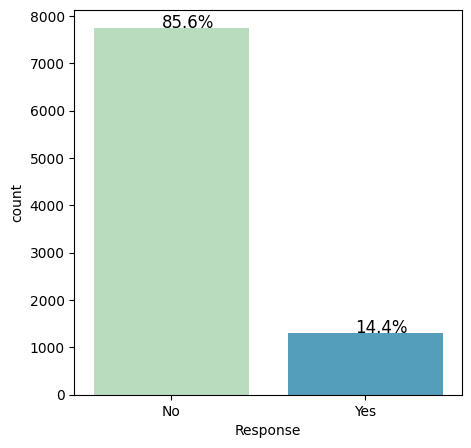

In [29]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df, x='Response', palette='GnBu')
without_hue(ax, df['Response'])

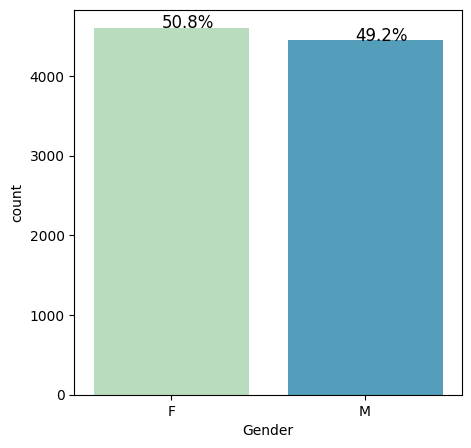

In [30]:
plt.figure(figsize = (5, 5))
ax = sns.countplot(data=df, x='Gender', palette = 'GnBu')
without_hue(ax, df['Gender'])

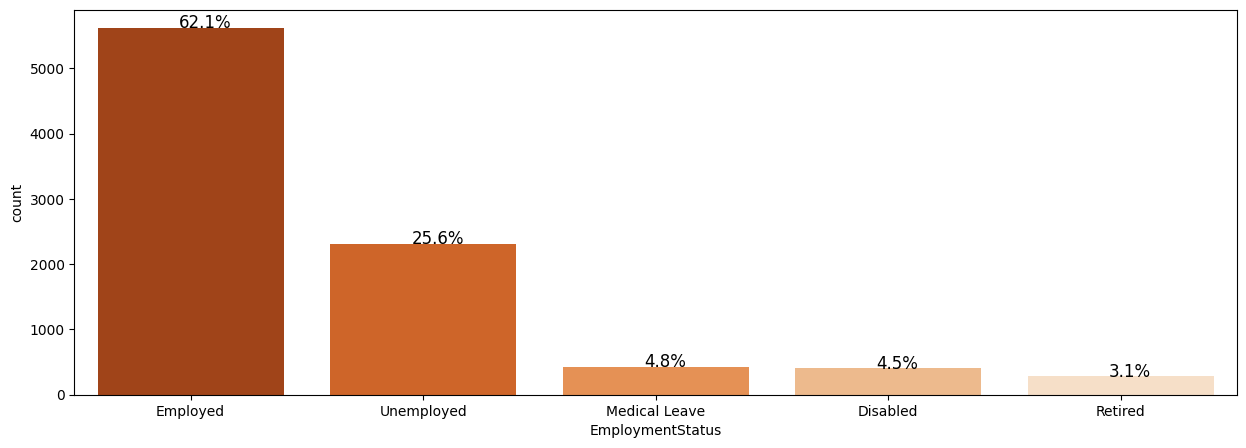

In [31]:
# See the number of customers based on employment status

plt.figure(figsize = (15, 5))
ax = sns.countplot(data=df, x='EmploymentStatus', palette = 'Oranges_r')
without_hue(ax, df['EmploymentStatus'])

In [32]:
a = ((pd.crosstab(index = df['EmploymentStatus'], columns = df['Response'], 
                  normalize = "columns"))*100).round(2)

a.sort_values('Yes', ascending = False)

Response,No,Yes
EmploymentStatus,,
Employed,62.86,57.60
Retired,1.01,15.67
Unemployed,27.30,15.21
Medical Leave,4.55,5.99
Disabled,4.29,5.53


In [33]:
a = ((pd.crosstab(index = df['Location Code'], columns = df['Response'], 
                  normalize = "index"))*100).round(2)

a.sort_values('Yes', ascending = False)

Response,No,Yes
Location Code,,
Suburban,82.56,17.44
Rural,90.74,9.26
Urban,91.28,8.72


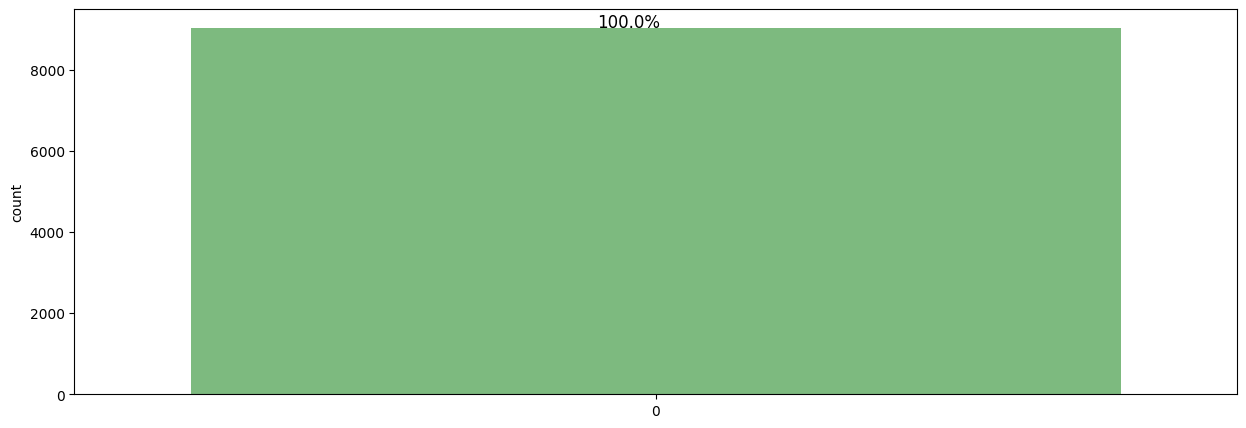

In [34]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(df['Number of Open Complaints'], palette = 'Greens')
without_hue(ax, df['Number of Open Complaints'])

# ~21% of customers who have complaints that have not been handled

In [35]:
a = ((pd.crosstab(index = df['Number of Open Complaints'], columns = df['Response'], 
                  normalize = "index"))*100).round(2)

a.sort_values('Yes', ascending = False)

Response,No,Yes
Number of Open Complaints,,
3,81.18,18.82
4,83.89,16.11
0,85.30,14.70
1,86.19,13.81
5,89.29,10.71
2,93.51,6.49


In [36]:
a = ((pd.crosstab(index = df['Months Since Last Claim'], columns = df['Response'], 
                  normalize = "index"))*100).round(2)

a.sort_values('Yes', ascending = False).head(10)

Response,No,Yes
Months Since Last Claim,,
16,77.40,22.60
3,77.89,22.11
10,80.13,19.87
1,80.65,19.35
18,81.50,18.50
21,81.90,18.10
28,82.09,17.91
25,82.13,17.87
23,82.13,17.87


In [37]:
a = ((pd.crosstab(index = df['Months Since Policy Inception'], columns = df['Response'], 
                  normalize = "index"))*100).round(2)

a.sort_values('Yes', ascending = False).head(10)

Response,No,Yes
Months Since Policy Inception,,
59,66.20,33.80
56,67.57,32.43
43,72.22,27.78
93,72.73,27.27
3,73.68,26.32
54,74.19,25.81
94,75.00,25.00
50,75.61,24.39
83,76.00,24.00


In [38]:
a = ((pd.crosstab(index = df['Policy Type'], columns = df['Response'], normalize = "columns"))*100).round(2)

a.sort_values('Yes', ascending = False)

Response,No,Yes
Policy Type,,
Personal Auto,74.57,73.27
Corporate Auto,21.37,21.97
Special Auto,4.06,4.76


In [39]:
a = ((pd.crosstab(index = df['Policy'], columns = df['Response'], normalize = "columns"))*100).round(2)

a.sort_values('Yes', ascending = False)

Response,No,Yes
Policy,,
Personal L3,37.80,35.87
Personal L2,23.27,23.27
Personal L1,13.50,14.13
Corporate L3,10.94,11.67
Corporate L2,6.47,6.61
Corporate L1,3.96,3.69
Special L3,1.51,2.38
Special L2,1.85,1.46
Special L1,0.70,0.92


In [40]:
((pd.crosstab(index = df['Renew Offer Type'], columns = df['Response'], normalize = 'columns'))*100).round(2)

# Offer 1 and offer 2 are more attractive to customers

Response,No,Yes
Renew Offer Type,,
Offer1,40.49,45.62
Offer2,28.48,52.07
Offer3,17.96,2.30
Offer4,13.07,0.00


In [41]:
((pd.crosstab(index = df['Vehicle Class'], columns = df['Response'], normalize = 'columns'))*100).round(2)

# More customers with standard cars (4 doors) are renewing

Response,No,Yes
Vehicle Class,,
Four-Door Car,51.00,47.93
Luxury Car,1.95,0.92
Luxury SUV,1.98,2.30
SUV,19.29,22.12
Sports Car,5.06,6.91
Two-Door Car,20.72,19.82


### Hypothesis:

- Customers who are employed or just married are more likely to consider policy renewal.
- Married policyholders typically enjoy **reduced premium costs.**
- **Premium rates are elevated for customers residing in urban areas.**
- Urban residents tend to file larger insurance claims.
- **Policyholders located in urban areas may express interest in policy renewal.**
- On average, male customers pay higher premiums compared to their female counterparts.
- Customers who opt for comprehensive coverage tend to face higher premium costs.
- The special auto policy is popular among customers with **moderate to low income levels**, resulting in lower premium expenses.
- Individuals with lower levels of education tend to be associated with higher claim frequencies due to increased risk.

### Hypothesis 1 : Customers who have jobs and / or who are married will be interested in renewing

In [42]:
((pd.crosstab(index = df['EmploymentStatus'], columns = df['Response'], normalize = 'columns'))*100).round(2)

# Employed customers are more interested in renewing

Response,No,Yes
EmploymentStatus,,
Disabled,4.29,5.53
Employed,62.86,57.60
Medical Leave,4.55,5.99
Retired,1.01,15.67
Unemployed,27.30,15.21


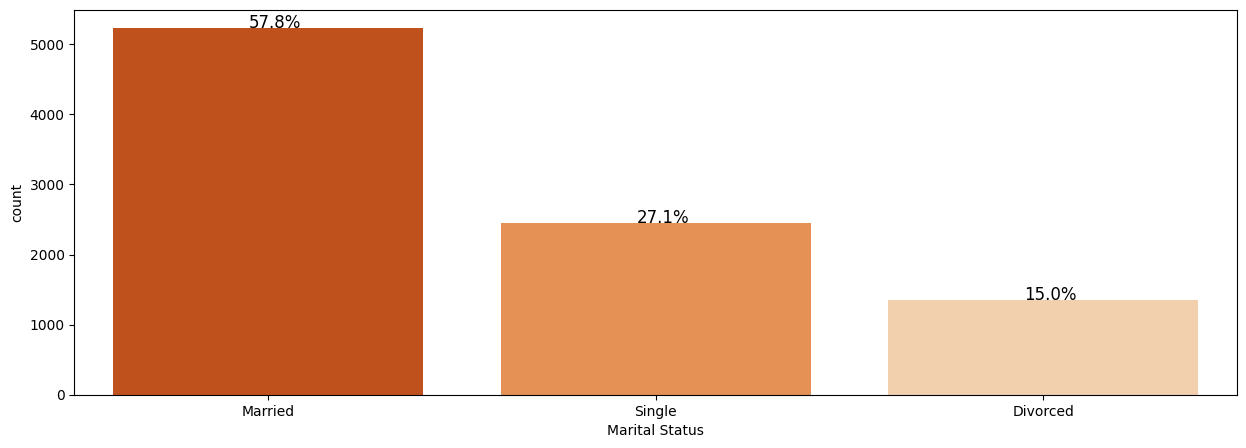

In [43]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(data=df, x='Marital Status', palette = 'Oranges_r')
without_hue(ax, df['Marital Status'])

In [44]:
((pd.crosstab(index = df['Marital Status'], columns = df['Response'], normalize = 'columns'))*100).round(3)

# Married customers are more interested in renewing

Response,No,Yes
Marital Status,,
Divorced,13.354,24.885
Married,58.659,52.995
Single,27.987,22.120


In [45]:
me_2 = ((pd.crosstab(index = [df['Marital Status'], df['EmploymentStatus']], 
                     columns = df['Response'], normalize = 'columns'))*100).round(2)

me_2.sort_values('Yes', ascending = False).head(10)

# Customers who have any marital status, especially married, are more interested in renewal

Response                            No    Yes
Marital Status EmploymentStatus              
Married        Employed          43.50  33.64
Single         Employed           9.92  12.44
Divorced       Employed           9.44  11.52
Married        Unemployed         8.67   7.83
               Retired            0.41   6.45
Divorced       Retired            0.37   5.99
               Unemployed         2.03   3.69
Single         Unemployed        16.61   3.69
               Retired            0.22   3.23
Divorced       Disabled           0.80   2.76

### Hypothesis 2 : Married customers have lower premium payments

In [46]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9045.000000,9045.000000,9045.000000,9045.000000,9045.000000,9045.000000,9045.000000,9045.000000
mean,8018.107354,37456.054505,93.307573,15.100276,48.072637,0.384301,2.965948,438.307258
std,6885.599540,30341.940129,34.488991,10.066179,27.892468,0.911265,2.390631,288.780471
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,10.168824
25%,3996.772165,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,279.714859
50%,5790.462518,33738.000000,83.000000,14.000000,48.000000,0.000000,2.000000,386.765125
75%,8991.984520,61990.000000,109.000000,23.000000,71.000000,0.000000,4.000000,552.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [47]:
from IPython.display import Image

image_url = "https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png" 
Image(url=image_url)

In [48]:
def remove_outliers(columns) :
    Q1 = df.describe()[f'{columns}']['25%']
    Q3 = df.describe()[f'{columns}']['75%']
    IQR = Q3 - Q1
    Upper_Fence = Q3 + (1.5 * IQR)
    Lower_Fence = Q1 - (1.5 * IQR)
    df.drop(df[(df[f'{columns}'] < Lower_Fence) | (df[f'{columns}'] > Upper_Fence)].index)
    mean = df[f'{columns}'].mean()
    print(f"Mean {columns} = {mean}")
    return

In [49]:
remove_outliers('Monthly Premium Auto')

Mean Monthly Premium Auto = 93.30757324488668


In [50]:
pd.crosstab(index = df['Marital Status'], columns = 'mean', 
            values = df['Monthly Premium Auto'], aggfunc = 'mean').sort_values('mean', ascending=False).round(1)

col_0,mean
Marital Status,
Single,94.0
Married,93.2
Divorced,92.7


#### Married customers have lower premiums than single customers
#### But the premium is higher than divorced customer

In [51]:
((pd.crosstab(index = [df['Marital Status'], df['numpolicy_group']], columns = 'count', 
              normalize = 'columns'))*100).round(2)

# Married customers buy more policies than divorced customers so premiums can be higher

col_0                           count
Marital Status numpolicy_group       
Divorced       Low              11.54
               Medium            1.63
               High              1.85
Married        Low              42.10
               Medium            7.69
               High              8.05
Single         Low              19.87
               Medium            3.64
               High              3.64

### Hypothesis 3: Customer premiums in urban areas are higher

In [52]:
remove_outliers('Monthly Premium Auto')

Mean Monthly Premium Auto = 93.30757324488668


In [53]:
pd.crosstab(index = df['Location Code'], columns = 'premi', values = df['Monthly Premium Auto'], 
            aggfunc = 'mean').sort_values('premi', ascending=False).round()

# Suburban pays a higher premium

col_0,premi
Location Code,
Suburban,95.0
Rural,90.0
Urban,90.0


In [54]:
remove_outliers('Monthly Premium Auto')

Mean Monthly Premium Auto = 93.30757324488668


In [55]:
pd.crosstab(index = df['Vehicle Class'], columns = 'premi', values = df['Monthly Premium Auto'], 
            aggfunc = 'mean').sort_values('premi', ascending=False).round()

# Luxury cars of any size have a higher average premium payment

col_0,premi
Vehicle Class,
Luxury SUV,213.0
Luxury Car,212.0
Sports Car,122.0
SUV,120.0
Four-Door Car,77.0
Two-Door Car,77.0


In [56]:
((pd.crosstab(index = [df['Location Code']], columns = df['Vehicle Class'], normalize = "columns"))*100).round(2)

# Suburban has more customers who own luxury cars

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Location Code,,,,,,
Rural,19.64,11.04,12.02,16.05,20.75,19.33
Suburban,62.39,77.91,76.50,65.94,64.52,63.00
Urban,17.98,11.04,11.48,18.01,14.73,17.67


### Hypothesis 4: Customers in urban areas have a high claim amount

In [57]:
# All customers have made claims

df[df['Total Claim Amount'] == 0]

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Income_group,Claim_group,clv_group,premi_group,numpolicy_group
Customer,,,,,,,,,,,,,,,,,,,,,


In [58]:
remove_outliers('Total Claim Amount')

Mean Total Claim Amount = 438.30725752482033


In [59]:
pd.crosstab(index = [df['Claim_group'], df['Location Code']], columns = 'claim', values = df['Total Claim Amount'], 
            aggfunc = 'mean').sort_values('claim', ascending=False).round()


col_0                          claim
Claim_group    Location Code        
more than 1500 Suburban       1889.0
up to 1500     Suburban        643.0
               Urban           511.0
               Rural           465.0
up to 400      Suburban        337.0
               Urban           277.0
               Rural           113.0

#### Customers in the suburbs make claims with amounts that are far above the average
#### Urban (urban) also includes location codes with a total claim amount above average

### Hypothesis 5: Customers in urban areas will be interested in renewing

In [60]:
lc = ((pd.crosstab(index = df['Location Code'], columns = df['Response'], normalize = 'columns'))*100).round(3)

lc.sort_values("Yes", ascending = False)

# Customers in suburban areas are more interested in renewing

Response,No,Yes
Location Code,,
Suburban,61.617,77.419
Rural,19.734,11.982
Urban,18.649,10.599


### Hypothesis 6: Male customers on average pay a higher premium than women

In [61]:
remove_outliers('Monthly Premium Auto')

Mean Monthly Premium Auto = 93.30757324488668


In [62]:
pd.crosstab(index = df['Gender'], columns = 'avg_premi', values = df['Monthly Premium Auto'], 
            aggfunc = 'mean').sort_values('avg_premi', ascending=False).round(3)

# Customer Male pays a higher premium than Female

col_0,avg_premi
Gender,
M,93.446
F,93.174


### Hypothesis 7: Customers with premium coverage pay higher premiums

In [63]:
remove_outliers('Monthly Premium Auto')

Mean Monthly Premium Auto = 93.30757324488668


In [64]:
(pd.crosstab(index = df['Coverage'], columns = 'premi', values = df['Monthly Premium Auto'], aggfunc = "mean")).round(2)

col_0,premi
Coverage,
Basic,82.22
Extended,103.69
Premium,133.44


### Hypothesis 8: The special auto policy has customers with an average lower middle income and lower premiums

In [65]:
((pd.crosstab(index = df['Policy Type'], columns = df['Income_group'], normalize = 'index'))*100).round(2)

# Customers who have a special auto policy predominantly have low income and high income

Income_group,Low Income,Medium Income,High Income
Policy Type,,,
Corporate Auto,39.00,25.55,35.45
Personal Auto,38.88,25.65,35.46
Special Auto,38.03,24.47,37.50


In [66]:
remove_outliers('Monthly Premium Auto')

Mean Monthly Premium Auto = 93.30757324488668


In [67]:
pd.crosstab(index = [df['Policy Type']], columns = 'premi', values = df['Monthly Premium Auto'], 
            aggfunc = 'mean').sort_values('premi', ascending=False).round(2)

# Customers with special auto policies have lower premium payments

col_0,premi
Policy Type,
Corporate Auto,93.38
Personal Auto,93.30
Special Auto,93.06


### Hypothesis 9: People with lower education are more at risk and therefore make more claims

In [68]:
remove_outliers('Total Claim Amount')

Mean Total Claim Amount = 438.30725752482033


In [69]:
pd.crosstab(index = df['Education'], columns = 'mean', values = df['Total Claim Amount'], 
            aggfunc = 'mean').sort_values('mean', ascending=False).round(2)

col_0,mean
Education,
High School or Below,491.08
Bachelor,432.03
College,427.90
Master,354.49
Doctor,345.16


#### People with the last education in high school or below have a higher risk of driving so they will make more claims
#### Claim value is also above the average total claim

### Response by State and CLV

In [70]:
remove_outliers('Customer Lifetime Value')

Mean Customer Lifetime Value = 8018.107353710005


In [71]:
yes = df[df['Response'] == 'Yes']

pd.crosstab(index = [yes['State'], yes['Response']], columns = 'clv', values = yes['Customer Lifetime Value'], 
            aggfunc = 'mean').sort_values('clv', ascending=False).round()

,col_0,clv
State,Response,
Oregon,Yes,8017.0
Arizona,Yes,8014.0
California,Yes,7930.0
Washington,Yes,7761.0
Nevada,Yes,6878.0


### Response by Location Code and CLV

In [72]:
remove_outliers('Customer Lifetime Value')

Mean Customer Lifetime Value = 8018.107353710005


In [73]:
yes = df[df['Response'] == 'Yes']

pd.crosstab(index = [yes['Location Code'], yes['Response']], columns = 'clv', values = yes['Customer Lifetime Value'], 
            aggfunc = 'mean').sort_values('clv', ascending=False).round()

,col_0,clv
Location Code,Response,
Suburban,Yes,8138.0
Urban,Yes,7179.0
Rural,Yes,6637.0


#### Customers who responded yes in suburban areas had an average CLV above the average value

### Response by Location Code dan Income Group

In [74]:
lc_ig = ((pd.crosstab(index = [df['Location Code'], df['Income_group']], columns = df['Response'], 
                      normalize = "columns"))*100).round(2)

lc_ig.sort_values('Yes', ascending = False)

Response                        No    Yes
Location Code Income_group               
Suburban      Low Income     34.07  37.79
              Medium Income  14.26  20.28
              High Income    13.29  19.35
Urban         High Income    10.73   8.29
Rural         High Income    11.53   7.83
              Medium Income   5.63   4.15
Urban         Medium Income   5.58   1.84
              Low Income      2.34   0.46
Rural         Low Income      2.57   0.00

#### Customers in suburban areas with low, medium and high income are more interested in renewal
#### Customers in rural areas with low income don't want to renew

### Response Per Sales Channel

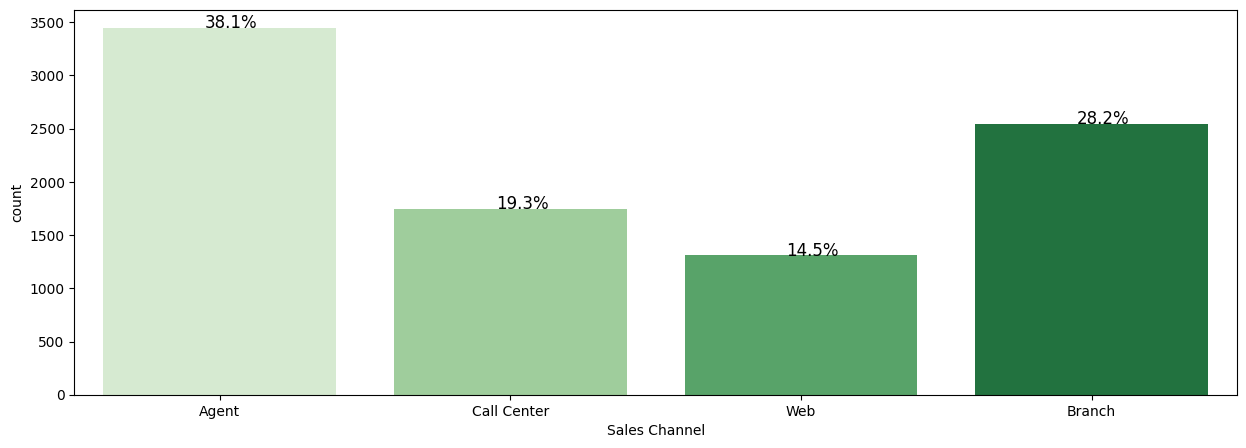

In [75]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(data=df, x='Sales Channel', palette = 'Greens')
without_hue(ax, df['Sales Channel'])

In [76]:
((pd.crosstab(index = [df['Sales Channel']], columns = df['Response'], normalize = 'columns'))*100).round(2)

Response,No,Yes
Sales Channel,,
Agent,35.89,51.15
Branch,29.10,22.58
Call Center,20.12,14.29
Web,14.89,11.98


#### Purchasing policies through agents remains a customer favorite
#### An agent can provide education and a good approach to customers

#### Response Per State dan Coverage

In [77]:
sc = ((pd.crosstab(index = [df['State'], df['Coverage']], columns = df['Response'], normalize = 'columns'))*100).round(2)

sc.sort_values('Yes', ascending = False).head(10)

# Customers in all countries are more interested in renewal basic coverage

,Response,No,Yes
State,Coverage,,
California,Basic,20.87,21.74
Oregon,Basic,17.58,16.67
Arizona,Basic,11.43,11.37
California,Extended,10.53,9.60
Oregon,Extended,8.27,9.52
Nevada,Basic,5.62,5.91
Washington,Basic,5.33,5.61
Arizona,Extended,5.68,5.30
California,Premium,3.05,3.46


### Response per Income Group dan Renew Offer Type

In [78]:
yes = df[df['Response'] == 'Yes']

((pd.crosstab(index = [yes['Income_group'], yes['Response']], columns = yes['Renew Offer Type'], 
              normalize = "index"))*100).round(2)

,Renew Offer Type,Offer1,Offer2,Offer3
Income_group,Response,,,
Low Income,Yes,66.27,33.73,0.00
Medium Income,Yes,42.11,56.14,1.75
High Income,Yes,25.97,68.83,5.19


#### Low income customers are more interested in renewing when offered offer 1
#### High income customers are more interested in renewing when offered offers 2 and 3
#### Offers 3 and 4 can be deleted (not valuable) and focus on offers 1 and 2 according to the customer's income group

### Customer characteristics based on Offer Type

In [79]:
yes = df[df['Response'] == 'Yes']

((pd.crosstab(index = [yes['Vehicle Class'], yes['Vehicle Size'], yes['Response']], columns = yes['Renew Offer Type'], 
              normalize = "index"))*100).round(2)

Renew Offer Type                     Offer1  Offer2  Offer3
Vehicle Class Vehicle Size Response                        
Four-Door Car Large        Yes        50.00   50.00    0.00
              Medsize      Yes        42.47   53.42    4.11
              Small        Yes        35.29   58.82    5.88
Luxury Car    Medsize      Yes         0.00  100.00    0.00
              Small        Yes       100.00    0.00    0.00
Luxury SUV    Medsize      Yes        75.00   25.00    0.00
              Small        Yes         0.00  100.00    0.00
SUV           Large        Yes        50.00   50.00    0.00
              Medsize      Yes        61.11   38.89    0.00
              Small        Yes        50.00   50.00    0.00
Sports Car    Large        Yes       100.00    0.00    0.00
              Medsize      Yes        38.46   61.54    0.00
Two-Door Car  Large        Yes        16.67   83.33    0.00
              Medsize      Yes        43.33   56.67    0.00
              Small        Yes        28.57   57.14   14.29

#### Offer 1 :
- Four-Door Car (Large)
- Luxury Car (Small)
- Luxury SUV (Med)
- SUV (Large, Med, Small)
- Sport Car (Large)

#### Offer 2 :
- Four-Door Car (Large, Med, Small)
- Luxury Car (Med)
- Luxury SUV (Small)
- SUV (Large, Small)
- Sport Car (Med)
- Two-Door Car (Large, Med, Small)

In [80]:
yes = df[df['Response'] == 'Yes']

((pd.crosstab(index = [yes['EmploymentStatus'], yes['Response']], columns = yes['Renew Offer Type'], 
              normalize = "index"))*100).round(2)

,Renew Offer Type,Offer1,Offer2,Offer3
EmploymentStatus,Response,,,
Disabled,Yes,75.00,25.00,0.00
Employed,Yes,30.40,66.40,3.20
Medical Leave,Yes,53.85,46.15,0.00
Retired,Yes,67.65,29.41,2.94
Unemployed,Yes,66.67,33.33,0.00


- Offer 1 : Disabled, Medical Leave, Retired, Unemployed
- Offer 2 : Employed

In [81]:
yes = df[df['Response'] == 'Yes']

((pd.crosstab(index = [yes['Income_group'], yes['Response']], columns = yes['Renew Offer Type'], 
              normalize = "index"))*100).round(2)

,Renew Offer Type,Offer1,Offer2,Offer3
Income_group,Response,,,
Low Income,Yes,66.27,33.73,0.00
Medium Income,Yes,42.11,56.14,1.75
High Income,Yes,25.97,68.83,5.19


- Offer 1 : Low Income
- Offer 2 : Medium and High Income

In [82]:
yes = df[df['Response'] == 'Yes']

((pd.crosstab(index = [yes['Coverage'], yes['Response']], columns = yes['Renew Offer Type'], 
              normalize = "index"))*100).round(2)

,Renew Offer Type,Offer1,Offer2,Offer3
Coverage,Response,,,
Basic,Yes,45.11,52.63,2.26
Extended,Yes,43.75,53.12,3.12
Premium,Yes,55.00,45.00,0.00


- Offer 1 : Premium
- Offer 2 : Basic, Extended

In [83]:
yes = df[df['Response'] == 'Yes']

((pd.crosstab(index = [yes['premi_group'], yes['Response']], columns = yes['Renew Offer Type'], 
              normalize = "index"))*100).round(2)

,Renew Offer Type,Offer1,Offer2,Offer3
premi_group,Response,,,
0 - 85 dollar,Yes,38.53,57.80,3.67
85 - 150 dollar,Yes,53.06,45.92,1.02
more than 150,Yes,50.00,50.00,0.00


- Offer 1: Premium 85 - 150 dollars (medium premium) and more than 150 dollars (high premium)
- Offer 2 : Premium 0 - 85 (low premium)

# Conclusion

- Only ~14% of customers agree to renew automobile insurance.

- More customers respond yes to basic coverage.
     - because it is enough to cover the basics when an accident occurs. Premium payments are cheaper so they suit basic needs and customer budgets.

- More than 50% of yes responses come from customers who have jobs.
     - because you have income that can be used to pay premiums. And there are also some jobs that require car insurance, for example drivers who have a higher risk while driving.

- More customers from suburban areas responded yes.

- Personal auto policy is the type of policy with the most renewals.
     - means this type of policy suits the needs of most customers in the company. Most customers have private cars and not cars used for business or customers are not registered with federal Medicaid with hospitalization. This personal policy usually covers the vehicle owner and one or two close family members.

- Offer 1 and offer 2 are more attractive/valuable for customers.

- Customers who have any job and marital status, especially married, are more interested in renewal.

- People with a high school education or below have a higher risk of driving so they will make more claims. On a demographic basis, highly educated people tend to be responsible drivers.

- Oregon and Arizona customers who respond yes have an almost average Clv so that these two states are potential for the company's revenue.

- Low income customers are more interested in renewal when offered offer 1.

- High income customers are more interested in renewal when offered offer 2.

- Customers tend not to be interested in offers 3 and 4 so these offers are not valuable according to customers.

- Each Renew Offer Type has different customer characteristics.

# Recommendation

- **If you want to contact customers, prioritize the following characteristics:**

     1. People who are **married** and or **already working** have a higher chance of meeting their bills. In addition, they also have greater financial security than single customers or unemployed customers because they can collect assets. When you are married, especially financial issues are something you need to pay attention to. So married customers tend to want to reduce costs and protect their assets, one of which is a vehicle in cases of accidents, loss or theft, flood damage and others so that it doesn't interfere with other needs.

     2. Customers with basic coverage because in the United States, in several states it is mandatory to have vehicle insurance, at a minimum it covers bodily injury and property damage so that it is enough to cover basic things when an accident occurs. Premium payments are cheaper so they suit basic needs and customer budgets.

     3. Personal Auto Policy, this type of policy suits the needs of most customers in the company. Most customers have private cars and not cars used for business or customers are not registered with federal Medicaid with hospitalization. This personal policy usually covers the vehicle owner and one or two close family members.

     4. Customers with a higher level of education are more likely to be responsible drivers, so they will have a lower claim rate.

     5. Customers in the suburbs because they have an average Clv value above the average value which means potential for company revenue because they can play a major role in the company's business activities.

    
- **Give the right type of offer to customers**
     1. Based on Vehicle Class and Size
         - Offer 1 : Four-Door Car (Large), Luxury Car (Small), Luxury SUV (Med), SUV (Large, Med, Small), Sport Car (Large)
         - Offer 2 : Four-Door Car (Large, Med, Small), Luxury Car (Med), Luxury SUV (Small), SUV (Large, Small), Sport Car (Med), Two-Door Car (Large, Med, small)
     2. Based on Employment Status
         - Offer 1 : Disabled, Medical Leave, Retired, Unemployed
         - Offer 2 : Employed
     3. Based on Income Group
         - Offer 1: Low Income
         - Offer 2 : Medium and High Income
     4. Based on Coverage
         - Offer 1 : Premium
         - Offer 2 : Basic, Extended
     5. Based on Premium
         - Offer 1: Premium 85 - 150 dollars (medium premium) and more than 150 dollars (high premium)
         - Offer 2 : Premium 0 - 85 (low premium)
        
        
- **Offers 3 and 4 can be removed from the policy for renewal offers because they are not valuable looking at the customer response**


- **Customers who are not interested in renewal**, ask why
    1. If due to cost constraints, it can be offered to lower the coverage type (from premium to basic) or policy level (personal level 2 to personal level 1).

    2. If because the car is no longer with the person concerned (sold) you can call back periodically when the customer has bought a new car (specifically for high income customers because it will be more likely to buy a car due to financial security).
   

- **Customers who are not interested in renewal**
     1. If the company is integrated with the bank: can be contacted again after there is an update of biodata, for example, an unemployed customer has got a job, so he has more potential to receive insurance because he already has income and offers it based on an appropriate offer.

     2. If the company is stand alone: can be contacted periodically, customers who have the potential to make premium payments smoothly, for example Employed or medium - high income customers.